In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import pysentani as sti
survey = pd.read_excel('../data-anonymous/sentani-merged-cleaned-anonymous-2014-11-29.xlsx')
survey['access_type'] = sti.access_type(survey)

In [3]:
appliances = ['lighting','TV','radio','fridge','rice_cooker','fan']

In [4]:
for a in appliances:
    wk_col = 'app_{}_per_wk'.format(a)
    survey[wk_col] = survey[wk_col][survey[wk_col]<=7]
    hr_col = 'app_{}_hrs'.format(a)
    survey[hr_col] = survey[hr_col][survey[hr_col]<=24]
    weekly_hr_col = 'weekly_hrs/{}'.format(a)
    survey[weekly_hr_col] = survey[wk_col] * survey[hr_col]

In [5]:
wk_columns = [f for f in survey.columns if 'weekly' in f]
id_columns = ['access_type']

columns = wk_columns + id_columns
plt_data = pd.melt(survey[columns], value_vars=wk_columns, id_vars=id_columns)

In [6]:
plt_data.head()

,access_type,variable,value
0,no_access,weekly_hrs/lighting,NaN
1,no_access,weekly_hrs/lighting,6
2,no_access,weekly_hrs/lighting,NaN
3,no_access,weekly_hrs/lighting,16
4,no_access,weekly_hrs/lighting,42


In [7]:
plt_data.rename(columns={'access_type': 'Access Type'},inplace = True)


plt_data.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                             'community_microgrid': 'Community Microgrid',
                                             'PLN_microgrid': 'PLN Microgrid',
                                             'no_access': 'No Access'}},inplace = True)

plt_data.replace(to_replace = {'variable': {'weekly_hrs/rice_cooker': 'Rice Cooker',
                                            'weekly_hrs/TV': 'TV',
                                            'weekly_hrs/fridge': 'Fridge',
                                            'weekly_hrs/fan':'Fan',
                                            'weekly_hrs/lighting': 'Lighting',
                                            'weekly_hrs/radio': 'Radio'}},inplace = True)


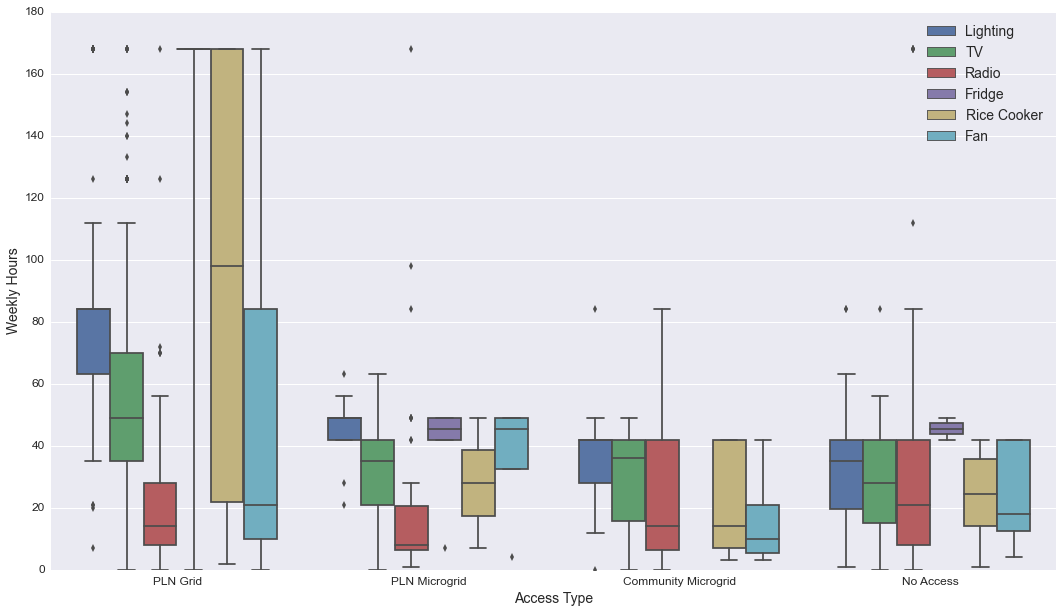

In [8]:
plt.figure(figsize=(18,10))
sns.boxplot(data=plt_data, hue='variable', y='value', x='Access Type',
            order=['PLN Grid','PLN Microgrid','Community Microgrid','No Access'])
plt.ylabel('Weekly Hours', fontsize=14)
plt.xlabel('Access Type', fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(prop={'size':14})
plt.savefig('appliance-hours.pdf')